In [2]:
import numpy as np
import pandas as pd
from scipy import sparse
from scipy import cluster
from scipy import spatial
from matplotlib import pyplot as plt
import seaborn
import copy
%matplotlib inline

# Clustering by tags

### Data Cleaning

In [3]:
big_set = pd.read_csv('./data/artists.csv', low_memory=False)

In [4]:
artist_tags=big_set[['artist_mb', 'tags_mb']]

In [5]:
artist_tags = artist_tags.dropna()
artist_tags

,artist_mb,tags_mb
0,Coldplay,rock; pop; alternative rock; british; uk; brit...
1,Radiohead,rock; electronic; alternative rock; british; g...
2,Red Hot Chili Peppers,rock; alternative rock; 80s; 90s; rap; metal; ...
3,Rihanna,pop; dance; hip hop; reggae; contemporary r b;...
4,Eminem,turkish; rap; american; hip-hop; hip hop; hiph...
...,...,...
1466059,Kazushige Kinoshita,japanese; violinist; japan; chamber music; fre...
1466061,水越恵子,likedis auto
1466063,大槻ケンヂ,rock
1466069,孫耀威,chinese


In [ ]:
artist_tags['tags_mb'] = artist_tags['tags_mb'].apply(lambda x: np.array([tag.strip() for tag in x.split(';')]))

In [ ]:
artist_tags

In [11]:
artist_tags_len = artist_tags
artist_tags_len['tags_len'] = artist_tags_len['tags_mb'].apply(lambda x: len(x))

In [12]:
np_artists = artist_tags_len['tags_mb'].to_numpy()

In [13]:
np_artists

array([array(['rock', 'pop', 'alternative rock', 'british', 'uk', 'britannique',
              'britpop', 'pop rock', 'piano pop', 'piano rock', 'english',
              'parlophone', 'rock and indie', 'ambient pop', 'pop/rock',
              'chapel', 'post-britpop'], dtype='<U16')                          ,
       array(['rock', 'electronic', 'alternative rock', 'british', 'grunge',
              'uk', 'britannique', 'britpop', 'art rock', 'experimental rock',
              'english', 'chamber pop', 'parlophone', 'england', 'melancholic',
              'oxford', 'bootleg', 'rock and indie', 'c’était mieux avant',
              'art pop', 'nude', 'sacred cows'], dtype='<U19')                 ,
       array(['rock', 'alternative rock', '80s', '90s', 'rap', 'metal',
              'american', 'crossover', 'usa', 'funk', 'funk rock', 'alternative',
              'pop rock', 'funk metal', 'rap rock', '00s', 'dvd',
              'pop and chart', '10s', 'funk rock tributo'], dtype='<U17')   

In [14]:
indptr = [0]
indices = []
data = []
vocabulary = {}
for d in np_artists:
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))
    

tag_matrix = sparse.csr_matrix((data, indices, indptr), dtype=int)
tmr = tag_matrix.toarray()

In [15]:
tag_matrix

<119943x36091 sparse matrix of type '<class 'numpy.int64'>'
	with 305601 stored elements in Compressed Sparse Row format>

In [16]:
from scipy.sparse import * 
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [159]:
X=tag_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=200, random_state=0).fit(X)


array([141,  45,  91,  68,  60, 151,  58,  29,  89,  49, 166, 120, 139,
        20,  52,  92,  36,  21,  15,  77,  90,  23, 112, 131, 146,  51,
       124, 142,  69, 118, 186, 119,  85, 148,   5, 107,  37,  28, 153,
       143,  14, 175,  71,  65,  93,  78,  42,  64, 147, 102, 106, 111,
         8, 152,   9,  32, 157,  12, 195,  25, 129,  82, 191,  81,  44,
         6,  16,  67,   2, 194, 179,  17,  76, 117, 103, 136,  70,  24,
       128, 182, 184,  46, 193,  63,  47,  31,  22, 140, 192, 158,  34,
       178,  30,  96,  84,  26, 173,  40, 160, 183, 156,  50, 181, 162,
        48, 188,  59, 150, 145,  94, 144,  43,  39,  18,  95, 163,  75,
       130, 121, 134,  83,  53,  10, 110, 105,   4, 168, 115,  55, 133,
        66, 123, 101, 164,  27,  19, 177,  86,  97, 116, 109,   7,  79,
       154,  99,  57, 159, 122, 189, 167,  98, 100, 155,  54, 169, 161,
        35, 114,  62, 113,  61, 171, 197, 125,   1,  13,  80, 165, 185,
        41, 126, 138,   0,  33, 176, 172, 196, 187, 137, 170, 14

# Top 200 By Listeners

### Agglomerative Ward Clustering

In [17]:
pd.options.mode.chained_assignment = None
top2k = artist_tags[:200]

In [18]:
top2k

,artist_mb,tags_mb,tags_len
0,Coldplay,"[rock, pop, alternative rock, british, uk, bri...",17
1,Radiohead,"[rock, electronic, alternative rock, british, ...",22
2,Red Hot Chili Peppers,"[rock, alternative rock, 80s, 90s, rap, metal,...",20
3,Rihanna,"[pop, dance, hip hop, reggae, contemporary r b...",20
4,Eminem,"[turkish, rap, american, hip-hop, hip hop, hip...",19
...,...,...,...
212,Fatboy Slim,"[trip-hop, electronic, big beat, dance, britis...",11
213,Ellie Goulding,"[synthpop, pop, drum and bass, electropop, cha...",7
214,The xx,"[british, uk, britannique, indie pop, english]",5
215,Lynyrd Skynyrd,"[rock, american, hard rock, blues rock, southe...",9


In [19]:
top2k_tags_len = top2k
top2k_tags_len['tags_len'] = top2k_tags_len['tags_mb'].apply(lambda x: len(x))

In [20]:
top2k_artists = top2k_tags_len['tags_mb'].to_numpy()

In [21]:
indptr = [0]
indices = []
data = []
vocabulary = {}
for d in top2k_artists:
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))
    

tag_matrix = sparse.csr_matrix((data, indices, indptr), dtype=int)
tmr = tag_matrix.toarray()

In [36]:
tag_matrix

<200x731 sparse matrix of type '<class 'numpy.int64'>'
	with 2759 stored elements in Compressed Sparse Row format>

In [22]:
condensed = tag_matrix.todense()

In [23]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
  
    plt.figure(figsize=(20,100))
    plt.rcParams.update({'font.size': 22})
    dendrogram(linkage_matrix, **kwargs)    
    plt.title("Hierarchical Clustering Dendrogram") 
    
    plt.savefig('test1.png', format="png")
    plt.show()
    

In [24]:
from matplotlib import pyplot as plt
from matplotlib import matplotlib_fname as fname
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(condensed)
label_vals = top2k['artist_mb'].to_list()

The below graph uses agglomerative clustering via a ward linkage to create a dendrogram of the top 200 artists by listeners on Last.fm

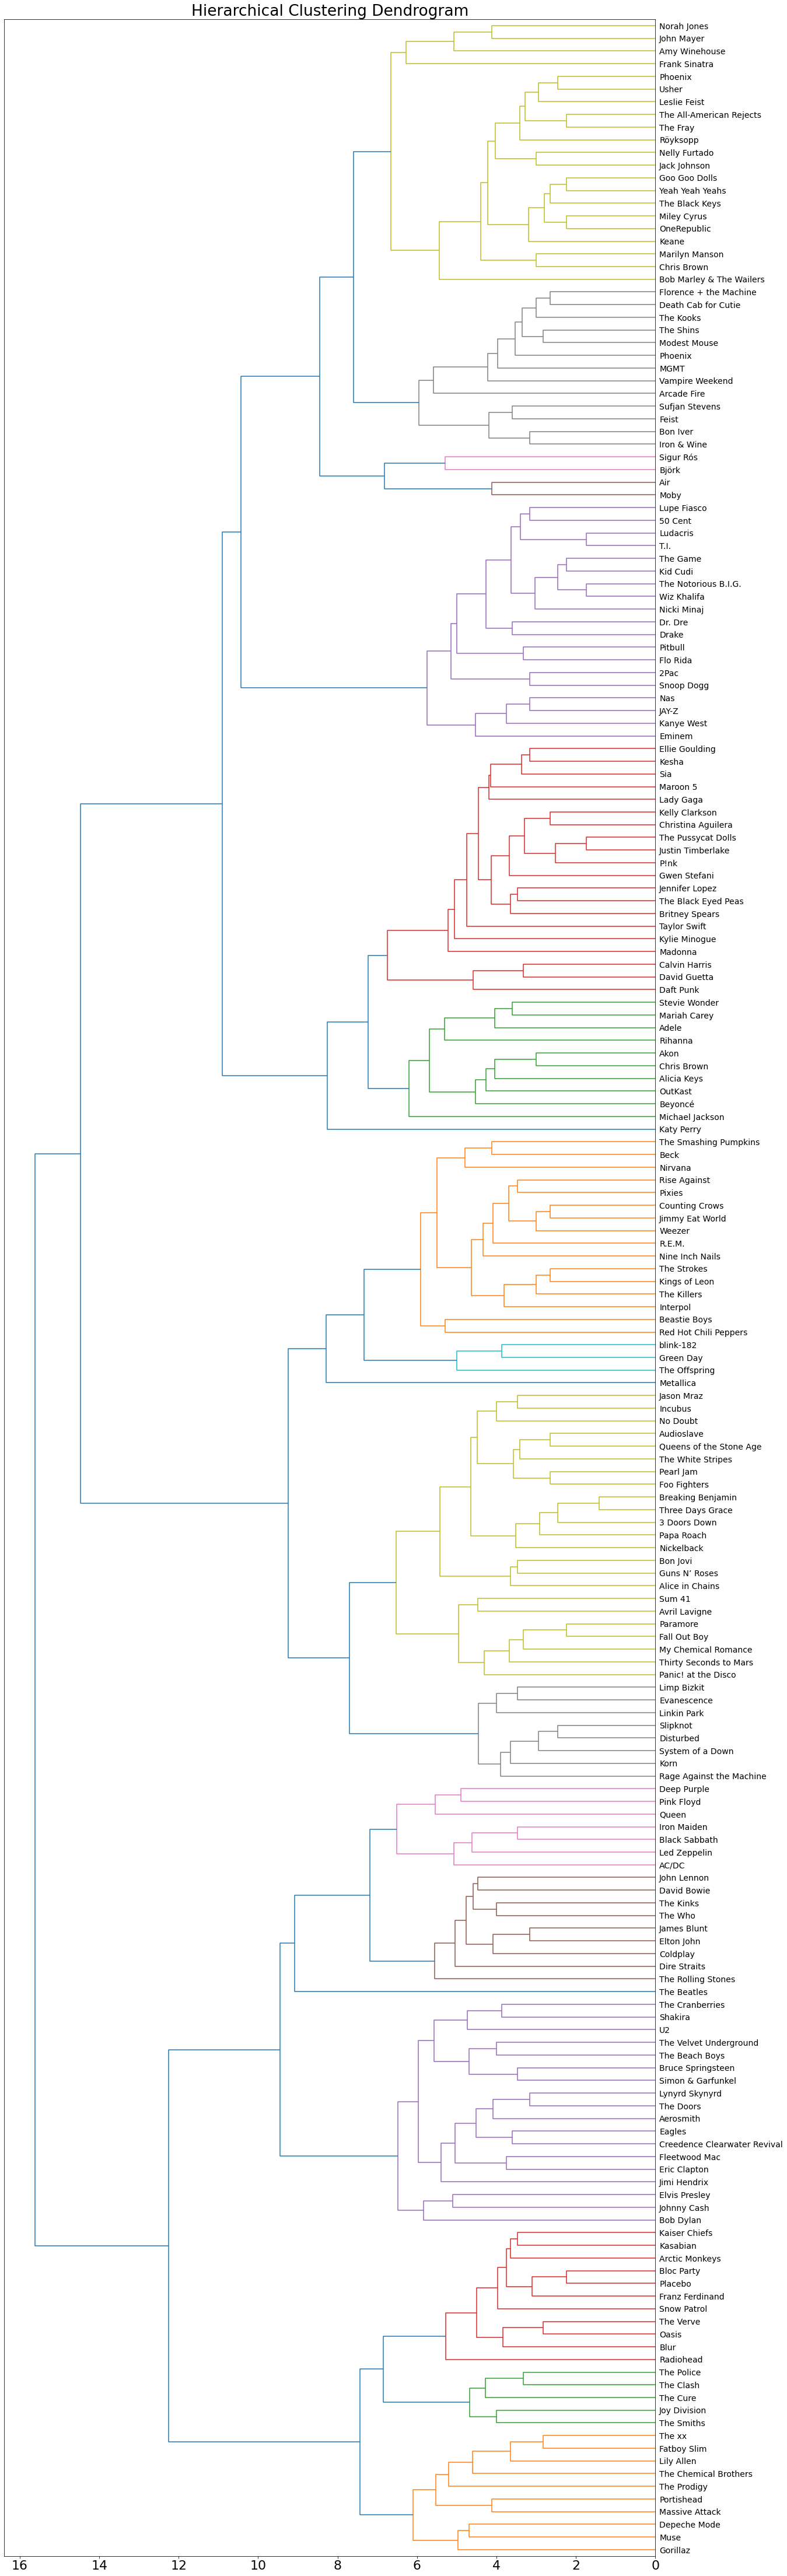

In [26]:
plot_dendrogram(model, labels=label_vals, leaf_font_size=14, color_threshold=6.75, orientation='left')
plt.clf()
plt.cla()
plt.close()

In [27]:
vocabulary

{'rock': 0,
 'pop': 1,
 'alternative rock': 2,
 'british': 3,
 'uk': 4,
 'britannique': 5,
 'britpop': 6,
 'pop rock': 7,
 'piano pop': 8,
 'piano rock': 9,
 'english': 10,
 'parlophone': 11,
 'rock and indie': 12,
 'ambient pop': 13,
 'pop/rock': 14,
 'chapel': 15,
 'post-britpop': 16,
 'electronic': 17,
 'grunge': 18,
 'art rock': 19,
 'experimental rock': 20,
 'chamber pop': 21,
 'england': 22,
 'melancholic': 23,
 'oxford': 24,
 'bootleg': 25,
 'c’était mieux avant': 26,
 'art pop': 27,
 'nude': 28,
 'sacred cows': 29,
 '80s': 30,
 '90s': 31,
 'rap': 32,
 'metal': 33,
 'american': 34,
 'crossover': 35,
 'usa': 36,
 'funk': 37,
 'funk rock': 38,
 'alternative': 39,
 'funk metal': 40,
 'rap rock': 41,
 '00s': 42,
 'dvd': 43,
 'pop and chart': 44,
 '10s': 45,
 'funk rock tributo': 46,
 'dance': 47,
 'hip hop': 48,
 'reggae': 49,
 'contemporary r b': 50,
 'electropop': 51,
 'rnb': 52,
 'barbadian': 53,
 'dance-pop': 54,
 'dancehall': 55,
 'electro house': 56,
 'pop soul': 57,
 'rihanna

### Average Link

In [136]:
pd.options.mode.chained_assignment = None
top2k = artist_tags[:200]

In [137]:
top2k

,artist_mb,tags_mb,tags_len
0,Coldplay,"[rock, pop, alternative rock, british, uk, bri...",17
1,Radiohead,"[rock, electronic, alternative rock, british, ...",22
2,Red Hot Chili Peppers,"[rock, alternative rock, 80s, 90s, rap, metal,...",20
3,Rihanna,"[pop, dance, hip hop, reggae, contemporary r b...",20
4,Eminem,"[turkish, rap, american, hip-hop, hip hop, hip...",19
...,...,...,...
212,Fatboy Slim,"[trip-hop, electronic, big beat, dance, britis...",11
213,Ellie Goulding,"[synthpop, pop, drum and bass, electropop, cha...",7
214,The xx,"[british, uk, britannique, indie pop, english]",5
215,Lynyrd Skynyrd,"[rock, american, hard rock, blues rock, southe...",9


In [138]:
top2k_tags_len = top2k
top2k_tags_len['tags_len'] = top2k_tags_len['tags_mb'].apply(lambda x: len(x))

In [139]:
top2k_artists = top2k_tags_len['tags_mb'].to_numpy()

In [150]:
indptr = [0]
indices = []
data = []
vocabulary = {}
for d in top2k_artists:
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))
    

tag_matrix = sparse.csr_matrix((data, indices, indptr), dtype=int)
tmr = tag_matrix.toarray()

In [151]:
condensed = tag_matrix.todense()

In [185]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
  
    plt.figure(figsize=(20,80))
    plt.rcParams.update({'font.size': 22})
    dendrogram(linkage_matrix, **kwargs)    
    plt.title("Hierarchical Clustering Dendrogram") 
    
    plt.savefig('test1.png', format="png")
    plt.show()
    

In [192]:
from matplotlib import pyplot as plt
from matplotlib import matplotlib_fname as fname
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average', affinity='cosine')

model = model.fit(condensed)
label_vals = top2k['artist_mb'].to_list()

The below graph uses agglomerative clustering via a average linkage and cosine distance measurements to create a dendrogram of the top 200 artists by listeners on Last.fm

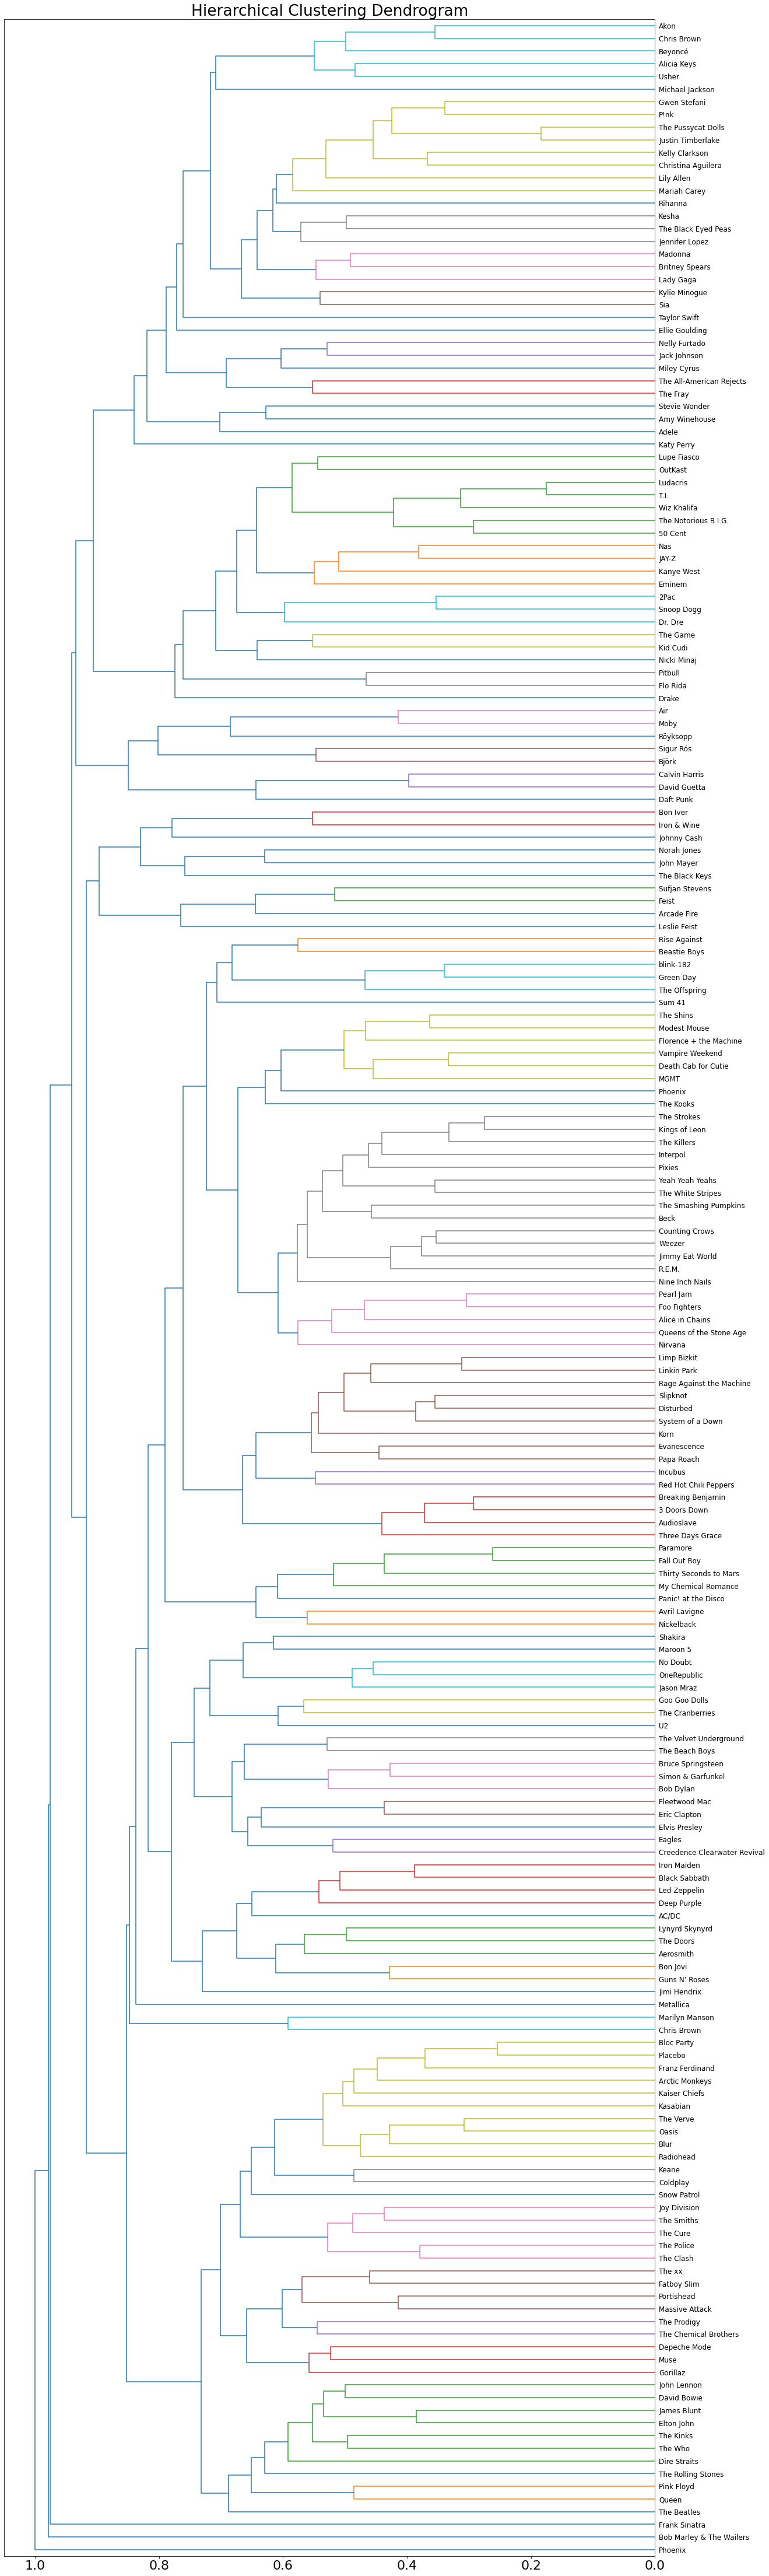

In [195]:
plot_dendrogram(model, labels=label_vals, leaf_font_size=12, color_threshold=0.6, orientation='left')
plt.clf()
plt.cla()
plt.close()